<a href="https://colab.research.google.com/github/tugcegurbuz/DeepLearning_TF/blob/master/2_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description:** Linear Regression with TensorFlow

Example dataset: Fuel consumption and carbondioxide emission of cars

---

When more than one independent variable is present the process is called multiple linear regression.

When multiple dependent variables are predicted the process is known as multivariate linear regression.

The equation of a simple linear model is

$$Y = a X + b $$

Where Y is the dependent variable and X is the independent variable, and ***a*** and ***b*** being the parameters we adjust.

In [0]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [0]:
#Define IV
X = np.arange(0.0, 5.0, 0.1)

In [0]:
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

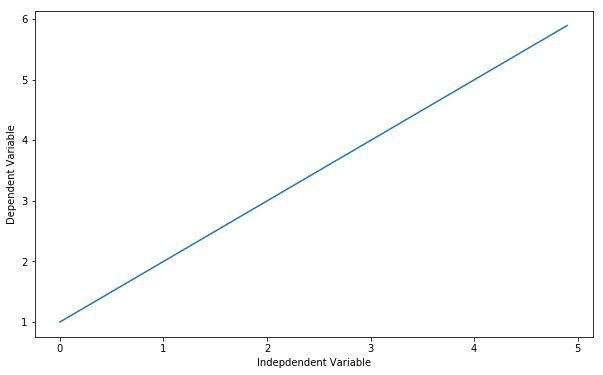

In [0]:
#Let's see our linear regression point with some parameters

#Parameters
a = 1
b = 1

#Linear regression model
Y= a * X + b 

#Plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

plt.plot(X, Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [0]:
#Download an example dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-06-08 17:42:07--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2019-06-08 17:42:07 (1.60 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [0]:
#Let's see our dataset
df = pd.read_csv("FuelConsumption.csv")

df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


**Task:** Let's say we want to predict CO2emission based on engine size

In [0]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df['CO2EMISSIONS'])

In [0]:
#Let's see our training x and y
train_x, train_y

(array([[2. ],
        [2.4],
        [1.5],
        ...,
        [3. ],
        [3.2],
        [3.2]]), array([196, 221, 136, ..., 271, 260, 294]))

In [0]:
#Initiliaze parameters as random numbers
a = tf.Variable(13.0)
b = tf.Variable(20.0)

#Linear Function
y = a * train_x + b

Now, we are going to define **a loss function** for our regression, so we can train our model to better fit our data. 

In a linear regression, we minimize the squared error of the difference between the predicted values(obtained from the equation) and the target values (the data that we have). In other words we want to minimize the square of the predicted values minus the target value. So we define the equation to be minimized as loss.

To find value of our loss, we use **tf.reduce_mean().** This function finds the mean of a multidimensional tensor, and the result can have a different dimension.

In [0]:
#Define the loss function
loss = tf.reduce_mean(tf.square(y - train_y))

In [0]:
#Let's see our loss function
loss

<tf.Tensor 'Mean_4:0' shape=() dtype=float32>

In [0]:
#Let's define our optimizer
learning_rate = 0.0005

#So, our training will minimize our loss function
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

**About Learning Rate:** The gradient Descent optimizer takes in parameter: learning rate, which corresponds to the speed with which the optimizer should learn; there are pros and cons for increasing the learning-rate parameter, with a high learning rate the training model converges quickly, but there is a risk that a high learning rate causes instability and the model will not converge. On the other hand decreasing the learning rate might reduce the convergence speed, but it would increase the chance of converging to a solution. You should note that the solution might not be a global optimal solution as there is a chance that the optimizer will get stuck in a local optimal solution.

In [0]:
#Now, it is time to initialize session and run it

#Initialize variables
init = tf.global_variables_initializer()

#Initialize session
sess = tf.Session()
sess.run(init)

In [0]:
#Let's run the session
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 41494.324 74.888405 39.27268
5 10662.722 52.65551 49.92478
10 9770.592 49.197556 64.25623
15 9000.845 45.789318 77.54684
20 8333.996 42.619137 89.91781
25 7756.289 39.66842 101.432274
30 7255.8047 36.92199 112.14954
35 6822.225 34.36571 122.12481
40 6446.603 31.986412 131.40944
45 6121.1943 29.771847 140.05125
50 5839.2847 27.710606 148.09474
55 5595.0586 25.79207 155.58136
60 5383.4805 24.006365 162.54964
65 5200.185 22.344294 169.03548
70 5041.39 20.797295 175.07227
75 4903.824 19.3574 180.6911
80 4784.6475 18.017197 185.92091
85 4681.4014 16.76979 190.78864
90 4591.9565 15.608737 195.31935
95 4514.4688 14.528073 199.53639


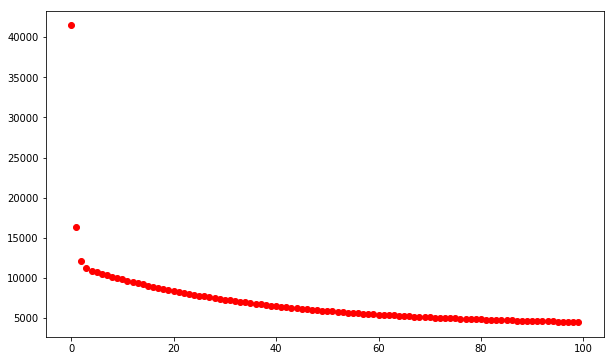

In [0]:
#Let's see how loss values are changed during the training

plt.plot(loss_values, 'ro')

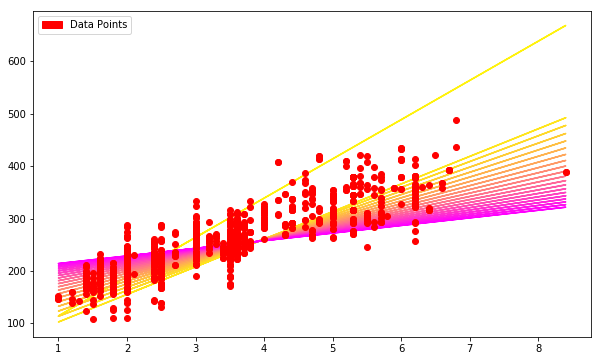

In [0]:
#Let's see how coefficients and intercepts have changed to fit the data
cr, cg, cb = (1.0, 1.0, 0.0)

for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
      
    [a, b] = f
    
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    
    line = plt.plot(train_x, f_y)
    
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()